In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay)

In [2]:
df = pd.read_csv('Cancer_Data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df = df.drop(columns=['Unnamed: 32'])

In [7]:
value_to_numeric = {
    'B': 0,
    'M': 1,
}

df['diagnosis_mapped'] = df['diagnosis'].map(value_to_numeric)

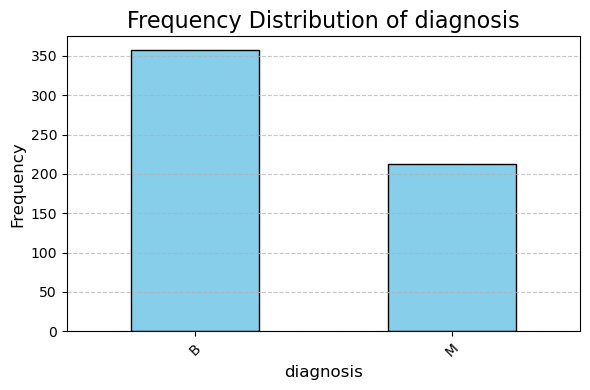

In [8]:
plt.figure(figsize=(6, 4))
df['diagnosis'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of diagnosis', fontsize=16)
plt.xlabel('diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
X = df.drop(columns=['diagnosis', 'diagnosis_mapped'])
y = df['diagnosis_mapped']

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

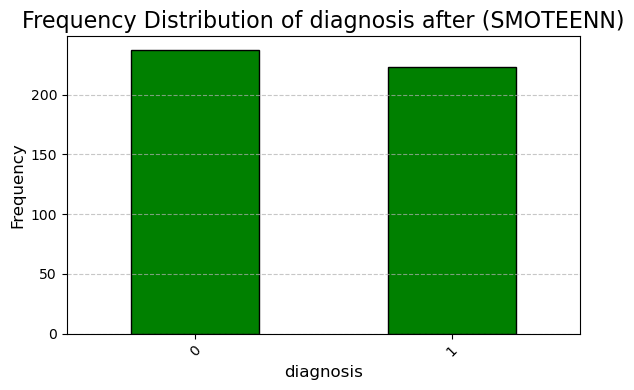

In [11]:
plt.figure(figsize=(6, 4))
pd.Series(y_resampled).value_counts().sort_values(ascending=False).plot(kind='bar', color='green', edgecolor='black')
plt.title('Frequency Distribution of diagnosis after (SMOTEENN)', fontsize=16)
plt.xlabel('diagnosis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(X_pca)
df_ready= pd.concat([X_pca_df, y_resampled.reset_index(drop=True)], axis=1)

In [13]:
df_ready.head()

,0,1,2,3,4,5,6,7,8,9,10,diagnosis_mapped
0,-2.663586,-0.041949,-1.350450,-1.576342,-0.009707,-0.716308,-0.322757,-0.003445,0.086857,0.515132,-0.388717,0
1,-2.194315,-1.324087,-0.492241,1.303187,0.170240,0.598479,-0.341616,-0.692453,-0.653615,0.575088,0.041811,0
2,-4.091735,-1.315197,0.919266,0.564403,-0.099389,0.223516,0.096883,0.369938,0.149590,0.633599,-0.488560,0
3,-3.730069,-1.736977,-0.485792,-0.349211,1.510569,-0.241598,0.011582,0.539065,0.040722,-0.317471,-0.437061,0
4,-3.962351,-0.588888,-0.080696,-0.773583,0.103234,0.669365,0.218769,-0.095529,0.172171,0.219942,0.903337,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y_resampled, test_size=0.2, random_state=42)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

log_model = logreg.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, log_model)
print(f'Accuracy: {accuracy:.4f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, log_model))

print("Classification Report:")
print(classification_report(y_test, log_model))

Accuracy: 1.0000
Confusion Matrix:
[[46  0]
 [ 0 46]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        46

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



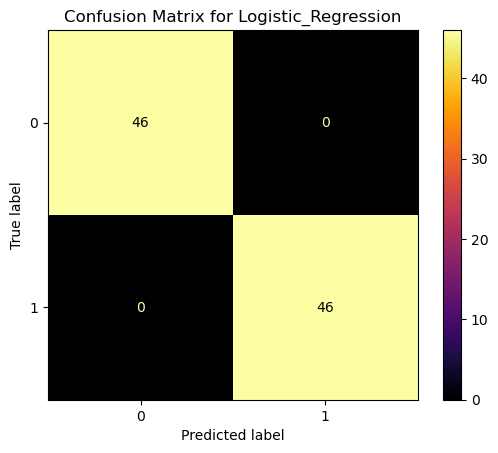

In [17]:
def plot_confusion_matrix(y_test, preds, model_name):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.inferno)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()
    
plot_confusion_matrix(y_test, log_model, "Logistic_Regression")

In [18]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)  # You can change the number of folds (cv=5)


In [19]:
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))


Cross-validation scores: [1.         0.97297297 1.         0.95890411 0.95890411]
Average cross-validation score: 0.9781562384302109
Standard deviation of cross-validation scores: 0.01856046879617966
